# Liscense Plate Detection with WPOD-NET

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from utils import detect_lp
from os.path import splitext,basename
from utils import detect_lp

import tensorflow as tf
import keras
from keras.models import model_from_json
import glob

Using TensorFlow backend.


In [1]:
keras.backend.backend()


NameError: name 'keras' is not defined

In [3]:
def load_model(model_path, model_weights):
    '''
    Input (STR): path to model.json, model.h5
    reads the model path, get model architecture from .json then load
    the weights from .h5 
    '''
    try:
        # parse json string to initialize model instance       
        with open(model_path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects=None)
        # load model weights
        model.load_weights(model_weights)
        print('Loaded model successfully...')
        
        return model
    except Exception as e:
        print(e)
        
        

In [4]:
wpod_net = load_model('wpod-net.json', 'wpod-net.h5')
# wpod_net.summary()

Loaded model successfully...


## Pre-process inputs

In [7]:
def preprocess(img_path, resize=False):
    '''
    Input: (STR) image path, (Bool) resize
    Output: processed version of image
    '''
    im = cv2.imread(img_path)
    # convert to RGB
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # standardize pixels between 0 and 1     
    im = im / 255
    # resize: if dim not (224,224)    
    if resize:
        im = cv2.resize(im, (224,224))
    return im

## Code to license plate detection

## Should a batch of input images

Found 526 images...


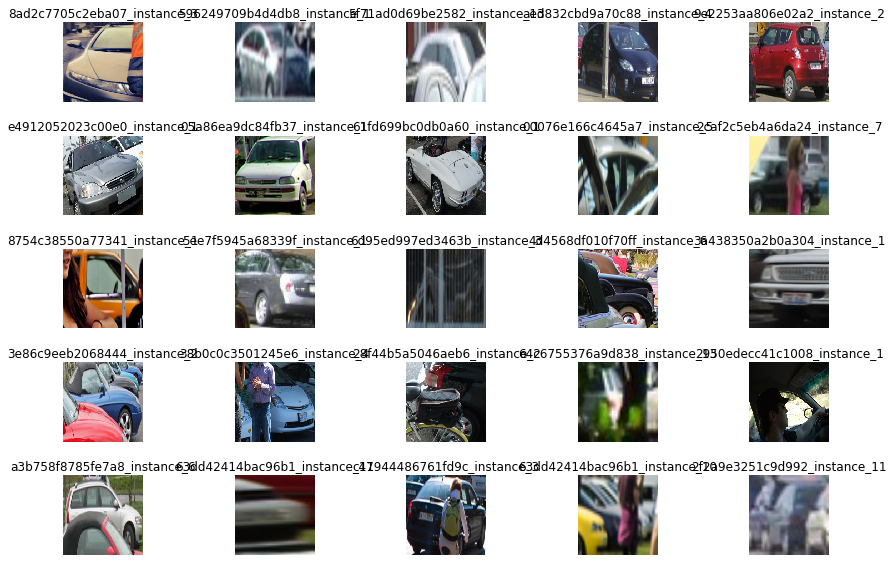

In [6]:
# Get list of .jpg files in car_bbox_out
input_path = glob.glob('car_bbox_out/*.jpg')
print('Found %i images...'%(len(input_path)))

# Visualize images with plot
fig = plt.figure(figsize=(12,8))
cols = 5
rows = 5
fig_list = []

for i in range(cols*rows):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(input_path[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess(input_path[i])
    plt.axis(False)
    plt.imshow(img)
plt.tight_layout(True)
plt.show()

(224, 224)

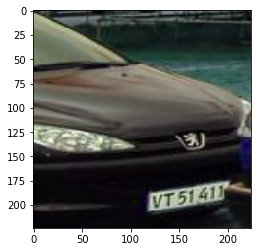

In [41]:
im = cv2.imread(input_path[34])
plt.imshow(im)
im.shape[:2]


## get detected license plates

Detect 2 plate(s) in 273332a1a1c576e8_instance_1
Coordinate of plate(s) in image: 
 [array([[118.4242027 , 200.67411107, 196.45721691, 114.20730854],
       [186.57604967, 174.79397636, 197.26033234, 209.04240565],
       [  1.        ,   1.        ,   1.        ,   1.        ]]), array([[ -2.91958482,  97.74818116,  90.56595194, -10.10181403],
       [119.86578101, 132.56030334, 149.2785127 , 136.58399036],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


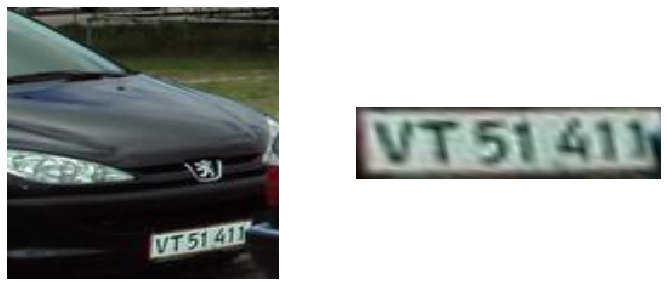

In [42]:
def detect_plate(img_path):
    '''
    Input: img_path (STR) 
    '''
    Dmax = 608
    Dmin = 408
    bbox = preprocess(img_path)
    # get width:height image ratio     
    ratio = float(max(bbox.shape[:2]) / min(bbox.shape[:2]))
    size = int(ratio*Dmin)
    bound = min(size, Dmax)
    # Detect LP with wpod-net
    _ , LpImg, _, cor = detect_lp(wpod_net, bbox, bound, lp_threshold=0.5)
    return LpImg, cor

demo = input_path[34]
LpImg, cor = detect_plate(demo)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(demo))[0])
print("Coordinate of plate(s) in image: \n", cor)

# Visualize our result
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess(demo))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

